In [4]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth',-1)

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [5]:
train_df = pd.read_json('data/seniority.train', lines=True)

In [6]:
test_df = pd.read_json('data/seniority.test', lines=True)

In [17]:
train_df.shape, test_df.shape

((29969, 3), (29999, 3))

In [18]:
df = pd.concat([train_df, test_df],axis=0)

In [28]:
df.head(6)

seniority_level  \
0  Entry            
1  Senior           
2  Mid-Level        
3  Intern           
4  Mid-Level        
5  Mid-Level        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               education  \
0  []                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  [{'school': 'University of Nebraska at Omaha', 'description': 'University of Nebraska at Omaha, Omaha, NE
Masters in Business Administration, Supply Chain Concentration (expected completion December 2018)', 'degree': 'Master of Business Administration - MBA', 'time': ['2017', '2018']}, {'school': 'University of the Pacific - Eberhardt School of Business', 'description': '', 'degree': 'Bachelors of Science in Business Administration with a Concentration in Marketing', 'time': ['2003', '2008']}]                                                      
2  [{'school': 'Tyee High School SeaTac', 'description': 'Tyee High School, SeaTac, Washington  -  High School
AUGUST 2008 - JUNE 2012', 'degree': '', 'time': ['2008-08-01', '2012-06-01']}]                                                                                                                                                                                                                                                                                                                                                                              
3  [{'school': 'UNIVERSITY OF ILLINOIS AT URBANA-CHAMPAIGN Champaign', 'description': 'UNIVERSITY OF ILLINOIS AT URBANA-CHAMPAIGN	Champaign, IL Master of Science in Finance, GPA: 3.77/4.00	Expected December 2018 CFA Level II Candidate', 'degree': 'Master of Science in Finance', 'time': ['notKnown', '2018-12-01']}, {'school': 'UNIVERSITY OF CALIFORNIA, BERKELEY Berkeley', 'description': 'UNIVERSITY OF CALIFORNIA, BERKELEY	Berkeley, CA B.A in Applied Mathematics	May 2017', 'degree': 'B.A in Applied Mathematics', 'time': ['notKnown', '2017-05-01']}]   
4  [{'school': '', 'description': 'GED, 1996   Indianapolis, IN', 'degree': 'GED', 'time': ['notKnown', '1996-01-01']}]                                                                                                                                                                                                                                                                                                                                                                                                                                                    
5  [{'school': 'Jackson State University', 'description': 'M.S., Hazardous Materials Management / B.S., Biology (pre-med), Jackson State University, Jackson, MS
 Exemplar Global Lead Environmental Auditor (EMS (ISO 14001), Environmental Management and Compliance Scopes) #112551 Exemplar Global OHSAS 18001 Safety Management Systems Lead Auditor Training Six Sigma Green Belt', 'degree': 'M.S.', 'time': []}]                                                                                                              

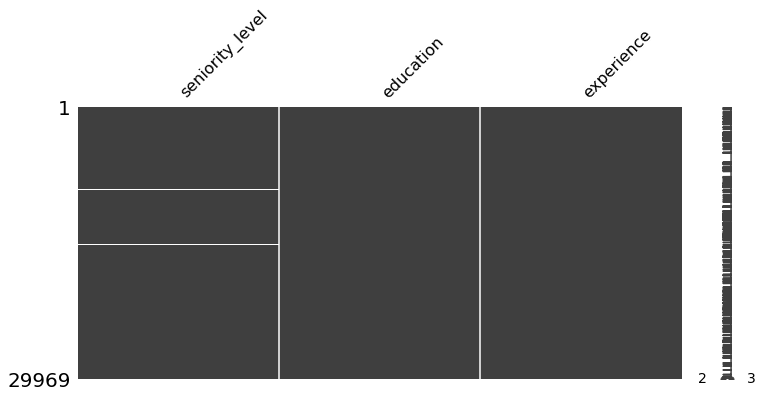

In [9]:
msno.matrix(train_df,figsize=(12,5))

In [30]:
df.seniority_level.value_counts()

Entry             18289
Mid-Level         18037
Manager           7965 
Senior            7760 
Director          3903 
Intern            1822 
Vice President    1121 
CXO               505  
Name: seniority_level, dtype: int64

In [31]:
df.isna().sum()

seniority_level    566
education          0  
experience         0  
dtype: int64

In [82]:
df.sample(1)

,seniority_level,education,experience,edu_count
12295,Manager,"[{'school': 'Oklahoma State University', 'description': 'Supply Chain Strategy, Integrated Manufacturing Control Systems.', 'degree': 'Industrial Engineering and Management, Supply Chain Management', 'time': ['2008', '2009']}, {'school': 'Visvesvaraya Technological University', 'description': 'Limited Engineering Education and Mostly fun.', 'degree': 'Bachelors in Engineering, Mechanical Engineering', 'time': ['2001', '2005']}]","[{'skills': [], 'time': ['June 2012', 'Present'], 'work': 'Cisco Systems', 'description': '', 'title': 'Manager, Supply Chain Operations'}, {'skills': [], 'time': ['July 2012', 'May 2014'], 'work': 'Cisco', 'description': '', 'title': 'Planning Manager'}, {'skills': ['inventory', 'manufacturing', 'planning', 'procurement', 'npi', 'analysis', 'fulfillment', 'mitigation', 'operations', 'buyers', 'business', 'vmi', 'process', 'scratch', 'drive', 'inventory analysis', 'projects'], 'time': ['January 2012', 'June 2012'], 'work': 'Benchmark Electronics', 'description': ' Engage and drive a team of buyers to ensure seamless Clear to Build (CTB) operations at manufacturing site  Interact with Business Partners to address material shortages, manufacturing and fulfillment issues  Supporting NPI projects and Proto builds from scratch until project is transferred to sustaining phase  Lead extended processes of planning ( E&O, VMI, Strategic Inventory etc), procurement and inventory analysis  Establish Material Shortage mitigation process and engage in war room scenario during critical customer release or demand upsides', 'title': 'Supply Chain Analyst II'}, {'skills': ['commodities', 'planning', 'inventory', 'material planning', 'gross margin', 'packaging', 'servers', 'microprocessors', 'supply', 'asics', 'freight', 'power supply', 'buyers', 'outbound', 'processors', 'product lines', 'power', 'inbound', 'component', 'delivery'], 'time': ['June 2010', 'January 2012'], 'work': 'Foxconn', 'description': ' Led the Material Planning Team of 2 Product Planners and 6 Component Buyers for Blade/Rack Servers, Switching Products  Expert in Planning Long Lead Time Commodities like Power Supply, Micro Processors, Memory, ASICS as well as Short Lead Time Commodities like Packaging, Popcorn Parts.  Consistently Reduce Freight(Inbound/Outbound) costs, Increase Inventory Turns, Reduce Weeks of Supply(WOS) to minimize impact to Gross Margin  Deliver product to Customer agreed SLA timelines. Consistently Monitor and reduce Product delivery Lead times.  Provide Bias and Forecast Variance Reports to Demand Planning Team to Improve overall Product Forecast Accuracy.  Managed Supply Planning close to 650 Various Commodities across 5-6 different Product lines.', 'title': 'Senior Supply Chain Planner'}, {'skills': ['supply chain', 'software'], 'time': ['October 2005', 'November 2007'], 'work': 'Infosys', 'description': ' Learnt and got my hands dirty in Software Programming for a couple of Years  During this time learnt about Manufacturing/Supply Chain and Decided to pursue Masters Specializing in Supply Chain', 'title': 'Software Engineer'}]",2


In [33]:
df['edu_count'] = df['education'].apply(lambda x: len(x))

In [34]:
df['edu_count'].describe()

count    59968.000000
mean     1.639391    
std      1.262230    
min      0.000000    
25%      1.000000    
50%      2.000000    
75%      2.000000    
max      24.000000   
Name: edu_count, dtype: float64

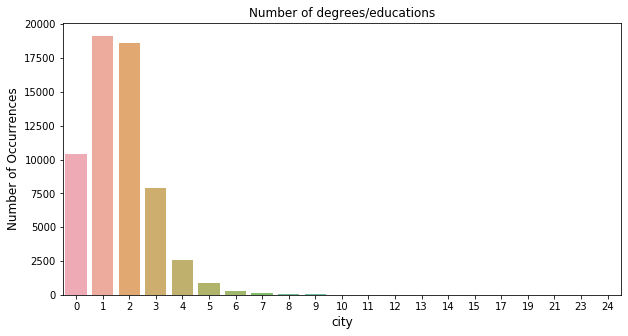

In [37]:
# Plotting a bar graph of the number of eduactions added 

edu_count  = df['edu_count'].value_counts()#max 10 educations
plt.figure(figsize=(10,5))
sns.barplot(edu_count.index, edu_count.values, alpha=0.8)
plt.title('Number of degrees/educations')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [38]:
edu_count

1     19133
2     18612
0     10414
3     7859 
4     2543 
5     854  
6     295  
7     127  
8     60   
9     29   
10    14   
12    9    
11    5    
14    5    
13    2    
17    2    
23    1    
15    1    
19    1    
21    1    
24    1    
Name: edu_count, dtype: int64

### Processing Education

In [81]:
sf_ed = df[['seniority_level', 'education','edu_count']].sample(10).copy()

In [74]:
def get_last_education_time(educations):
    edu_times = []
    
    for edu in educations:
        edu_times += edu.get('time')
    
    edu_times = [et for et in edu_times if et!='notKnown']
    latest_education_time = max(edu_times, default=None)
    
    return latest_education_time

In [75]:
def get_highest_degree_level(educations):
    degrees = set()
    
    for edu in educations:
        degrees.add(preprocess(edu.get('degree')[:1]))
    
#     edu_times = [et for et in edu_times if et!='notKnown']
#     latest_education_time = max(edu_times, default=None)
    
    return ''.join(sorted(degrees))

In [76]:
for a,b in sf_ed.iterrows():
    print(get_highest_degree_level(b.get('education')))


bm
bm
bm
b
b
bm
bhsy
e
bm


In [78]:
for a,b in sf_ed.iterrows():
    print(get_last_education_time(b.get('education')))

None
2012-01-01
2011
2019-12-01
2011-01-01
None
None
2015-06-10
2011
2015-06-01


### Processing Experience

In [146]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [83]:
df['ex_count'] = df['experience'].apply(lambda x: len(x))

In [86]:
sf_ex = df[['seniority_level', 'experience', 'ex_count']].sample(10).copy()

In [ ]:
## all titles

In [346]:
def get_titles(experience):
    
    titles_held = []
    for exp in experience:
        titles_held.append(exp.get('title'))
    if not titles:
        return None
    print(titles)
    return titles_held[0]

In [364]:
[ ex.get('title') for ex in df.iloc[0].experience if ex]

['General Laborer', 'Produce Associate', 'Dietary Aide']

In [366]:
get_titles(sf_ex.iloc[0].experience)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



'Account Executive'

In [124]:
titles = []
for a,b in df.iterrows():
    titles.extend(get_titles(b.get('experience')))
len(titles)

317865

In [126]:
tdf.columns = ['title']

In [524]:
from datetime import datetime
from dateutil import parser


def get_time_difference(s1,s2):
    
    t1 = parser.parse(s1)
    
    if s2 in ['Present', 'current', 'Current', 'Till Date']:
        s2 = datetime.today().strftime("%Y-%m-%d")
    
    t2 = parser.parse(s2)
    timedelta = t2 - t1
    return timedelta
 

def get_longest_tenure(experiences):
    exp_times = []
    
    for exp in experiences:
        try:
            t1,t2 = exp.get('time')
            timedelta = get_time_difference(t1,t2)
            exp_times.append(timedelta.days)
        except Exception as e:
            print(e)
            
    return max(exp_times,default=0),sum(exp_times)


In [326]:
for i in range(5):
    ets = get_longest_tenure(df.iloc[i].get('experience'))
#     print('--'*10, i,ets)

In [327]:
df.shape

(59968, 5)

In [339]:
sf_ex['longest_tenure'] =  sf_ex['experience'].apply(lambda x: get_longest_tenure(x)[0])

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


In [341]:
sf_ex['total_work_ex'] =  sf_ex['experience'].apply(lambda x: get_longest_tenure(x)[1])

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


### Text preprocessing

In [49]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [50]:
def convert_lower_case(data):
    return np.char.lower(data)

In [51]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [52]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

In [53]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [54]:
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [56]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
#     data = remove_stop_words(data)
#     data = stemming(data)
#     data = remove_punctuation(data)
#    

    return str(data)

In [244]:
preprocess(unique_degrees[0])

'master of business administration mba'

### RandomForest

In [368]:
df.head(1)

,seniority_level,education,experience,edu_count,ex_count
0,Entry,[],"[{'skills': ['production', 'labor', 'floors', 'safety', 'damages'], 'time': ['2017-03-01', 'Present'], 'work': 'Tyson Foods Incorporated', 'description': 'Safty person for my department I lead exsercises 3 times a day. I insure everyone has ppe gear. I do weekly walks thru departments to inspect for safty issues an damages. I also inspect lines for hazards an potential safety risks. I also preform general labor tasks such as shoveling totes of chicken an ice, floors, an production.', 'title': 'General Laborer'}, {'skills': ['customer service', 'cleaning', 'truck', 'holidays', 'fruit', 'associate', 'display'], 'time': ['2016-08-01', '2018-01-01'], 'work': 'Walmart', 'description': 'Produce associate. Responsibilities included stalking produce an coolers. Unloading am truck an inspecting produce received. Customer service an cleaning. During the holidays season I was responsible for designing an making fruit baskets at customer request an for store display.', 'title': 'Produce Associate'}, {'skills': ['production', 'breakfast', 'lunch'], 'time': ['2015-04-01', '2015-10-01'], 'work': '', 'description': 'Dietary aid. Responsibilities included cleaning dinning room an making guest drinks an bringing them breakfast. An help serve plates for lunch. After all meals clear tables an wash dishes Production Worker', 'title': 'Dietary Aide'}]",0,3


In [369]:
df['longest_tenure'] =  df['experience'].apply(lambda x: get_longest_tenure(x)[0])

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'Present')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
no

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'notKnown')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string 

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'abril de 2019')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got

not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unp

('Unknown string format:', 'Present')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
('String does not contain a date:', '')
('String does not contain a date

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
('String

not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'notKnown')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
n

('Unknown string format:', 'notKnown')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'notKnown')
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'notKnown')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expect

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
not enou

not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 1)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 1)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 1)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough value

not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'notKnown')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enoug

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


In [370]:
df['total_work_ex'] =  df['experience'].apply(lambda x: get_longest_tenure(x)[1])

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'notKnown')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enoug

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'N/A')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not en

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

('String does not contain a date:', '')
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unp

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unp

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'Present')
not enough values to unpack (expected 2, got 0)
no

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'notKnown')
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enoug

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'notKnown')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpa

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough value

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('String does not contain a date:', '')
not enough values to unp

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('Unknown string format:', 'Present')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
('String does no

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 1)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
('Unknown string format:', 'notKnown')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enoug

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'Present')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'Present')
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'Present')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to u

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2,

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')


('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enou

('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enou

not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
('String does not contain a date:', '')
not enough values to unpack (expected 2, got 0)
('Unknown string format:', 'notKnown')
('Unknown string format:', 'notKnown')
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpac

In [371]:
df['last_education'] = df['education'].apply(get_last_education_time)

In [372]:

df['degrees'] = df['education'].apply(get_highest_degree_level)

In [374]:
df.shape

(59968, 9)

In [377]:
df.sample()

,seniority_level,education,experience,edu_count,ex_count,longest_tenure,total_work_ex,last_education,degrees
25137,Mid-Level,"[{'school': 'Northern Illinois University', 'description': '', 'degree': 'Master of Business Administration (M.B.A.)', 'time': ['2011', '2013']}, {'school': 'Illinois State University', 'description': '', 'degree': 'Bachelor of Science (BS)', 'time': ['2006', '2009']}, {'school': 'Neuqua Valley High School', 'description': '', 'degree': 'College Prep', 'time': ['2001', '2005']}]","[{'skills': [], 'time': ['Jun 2018', 'Present'], 'work': 'Rubrik, Inc.', 'description': '', 'title': 'Account Executive'}, {'skills': [], 'time': ['Feb 2016', 'Jun 2018'], 'work': 'Nimble Storage', 'description': '', 'title': 'Account Executive'}, {'skills': [], 'time': ['Nov 2014', 'Feb 2016'], 'work': 'Tympani, Inc. - Chicago IT Consulting and Solutions', 'description': '', 'title': 'Account Manager'}, {'skills': [], 'time': ['Jun 2009', 'Oct 2014'], 'work': 'First American Bank', 'description': '', 'title': 'Commercial Loan Officer'}]",3,4,1948,3713,2013,bcm


In [409]:
DEGREES = ['b', 'm', 'a', 'c', 'd', 'p', 's', 'h', 'e', 'g', 'i', 'f', 't', 'l', 'n']

In [415]:
for deg in DEGREES:
    df[deg] = df['degrees'].apply(lambda x: deg in x)
    

In [421]:
df = df[['seniority_level','edu_count', 'ex_count',
       'longest_tenure', 'total_work_ex', 'last_education', 'b',
       'm', 'a', 'c', 'd', 'p', 's', 'h', 'e', 'g', 'i', 'f', 't', 'l', 'n']]

In [ ]:
df['days_since_last_education'] = df['last_education'].apply(time_since_last_education)

In [462]:
df = df.drop(['last_education'], axis=1)

In [487]:
df

,seniority_level,edu_count,ex_count,longest_tenure,total_work_ex,b,m,a,c,d,p,s,h,e,g,i,f,t,l,n,days_since_last_education
0,Entry,0,3,928,1629,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
1,Senior,2,7,1887,4413,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,365.0
2,Mid-Level,1,5,1035,2724,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2662.0
3,Intern,2,4,410,563,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,288.0
4,Mid-Level,1,5,2071,5313,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,8658.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Entry,1,2,2144,3453,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,502.0
29995,Manager,1,9,1840,7486,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8292.0
29996,Entry,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
29997,Mid-Level,1,4,1140,1993,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2479.0


#### RandomForest Classifier

In [489]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype

def fix_missing(df, col, name, na_dict):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict
na_dict = {}
for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)

In [500]:
df = df[df.seniority_level.notnull()]

In [501]:
df.isnull().sum()

seniority_level              0
edu_count                    0
ex_count                     0
longest_tenure               0
total_work_ex                0
b                            0
m                            0
a                            0
c                            0
d                            0
p                            0
s                            0
h                            0
e                            0
g                            0
i                            0
f                            0
t                            0
l                            0
n                            0
days_since_last_education    0
dtype: int64

In [502]:
Y = df['seniority_level']

In [503]:
X = df.drop(columns=['seniority_level'])

In [504]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 30000   #80:20 split
n_trn = len(df)-n_valid
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(Y, n_trn)

In [505]:
X_train.shape

(29402, 20)

In [506]:
X_valid.shape

(30000, 20)

In [507]:
from sklearn.ensemble import RandomForestClassifier

In [508]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=100, min_samples_leaf=7)
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [509]:
m.score(X_train, y_train)

0.6225086728793959

In [511]:
m.score(X_valid, y_valid)

0.5482666666666667

In [513]:
from joblib import dump, load
dump(m, 'seniority_rfr.joblib') 

['seniority_rfr.joblib']

In [ ]:
m.score()

In [515]:
clf = load('seniority_rfr.joblib')

In [531]:
X_valid.iloc[0]

edu_count                    2    
ex_count                     7    
longest_tenure               1840 
total_work_ex                5793 
b                            False
m                            False
a                            False
c                            True 
d                            True 
p                            False
s                            False
h                            False
e                            False
g                            False
i                            False
f                            False
t                            False
l                            False
n                            False
days_since_last_education    5370 
Name: 29692, dtype: object

In [530]:
X_valid.iloc[0].to_dict()

{'edu_count': 2,
 'ex_count': 7,
 'longest_tenure': 1840,
 'total_work_ex': 5793,
 'b': False,
 'm': False,
 'a': False,
 'c': True,
 'd': True,
 'p': False,
 's': False,
 'h': False,
 'e': False,
 'g': False,
 'i': False,
 'f': False,
 't': False,
 'l': False,
 'n': False,
 'days_since_last_education': 5370.0}

In [533]:
y_valid.iloc[0]

'Mid-Level'

In [521]:
type(X_valid[:1])

pandas.core.frame.DataFrame

In [457]:
df['days_since_last_education'] = df['last_education'].apply(time_since_last_education)

In [447]:
sf_ed['degrees'] = sf_ed['education'].apply(get_highest_degree_level)

In [448]:
unique_degrees = set()
for a in df['education']:
    for b in a:
        unique_degrees.add(b.get('degree'))


KeyError: 'education'

In [390]:
first_char = set()

for degree in unique_degrees:
    try:
        first_char.add(degree[0])
    except Exception as e:
        pass

In [391]:

tot_sum = 0
dic = []
for c in 'abcdefghijklmnopqrstuvwxyz':
    count =  len([degree for degree in unique_degrees if degree.lower().startswith(c)])
    dic += [(c, count)]
    tot_sum += count
print(tot_sum)

23493


In [408]:
[x[0] for x in sorted(dic, key=lambda x:x[1])[::-1][:15]]

['b', 'm', 'a', 'c', 'd', 'p', 's', 'h', 'e', 'g', 'i', 'f', 't', 'l', 'n']

In [398]:
10000*0.01

100.0

In [204]:
str(preprocess(unique_degrees[0]))

'master of business administration mba'

In [238]:
len(unique_degrees)

12077

In [239]:
len(set([d[:1] for d in unique_degrees]))

40

In [240]:
set([d[:1] for d in unique_degrees])

{'',
 ' ',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'м',
 'с',
 '大',
 '本'}

In [536]:
!head -1 data/seniority.test

{"seniority_level": "Mid-Level", "education": [{"school": "University of Wisconsin Madison", "description": "University of Wisconsin - Madison   Madison, WI\n\nSeptember 2005 - December 2009\nBachelor of Business Administration, Marketing, GPA 3.5/4.0", "degree": "Bachelor of Business Administration", "time": ["2005-09-01", "2009-12-01"]}, {"school": "UW", "description": "Certificate in Spanish Studies\nDean's List - Fall 2005\nUW Real Estate Club (4 Semesters)", "degree": "Certificate in Spanish", "time": ["notKnown", "2005-09-01"]}, {"school": "Universidad de Sevilla", "description": "Business Action for Sustainable Enterprise, B.A.S.E. (6 Semesters)\n\nUniversidad de Sevilla   Sevilla, Spain\nApril 2007 - December 2007", "degree": "B.A.S.E.", "time": ["2007-04-01", "2007-12-01"]}, {"school": "American TESOL Institute", "description": "American TESOL Institute   Phuket, Thailand\nApril 2010\nIntense 3-week teaching course\nInternationally recognized TEFL certificate, with a practical